# Verifying generalizability


In [1]:
%cd /home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1

/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1


In [2]:
from src.util import read_results, train_test_validate_split, eval_result, eval_sota_models
from evaluation.util import load_eval_results

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
plt.style.use("/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/std-colors.mplstyle")

%load_ext autoreload
%autoreload 2

In [3]:
result_df = read_results()
train, test, validate = train_test_validate_split(read_results())

train set:
	Records: 210953
	Positive (speedup > 1 with factorizing)/Negative: 39648/171305 = 0.23 s
	Dataset types: ['synthetic' 'hamlet']
\Compute Units: ['v100' 'CPU 08c' 'p100' 'CPU 16c' '1080' 'CPU 32c' '2080' 'a40']
test set:
	Records: 90409
	Positive (speedup > 1 with factorizing)/Negative: 16772/73637 = 0.23 s
	Dataset types: ['synthetic' 'hamlet']
\Compute Units: ['CPU 32c' '2080' 'CPU 16c' '1080' 'CPU 08c' 'v100' 'p100' 'a40']
validate set:
	Records: 11187
	Positive (speedup > 1 with factorizing)/Negative: 1123/10064 = 0.11 s
	Dataset types: ['synthetic' 'hamlet' 'tpc_ai']
\Compute Units: ['p100' 'CPU 32c' 'CPU 16c' 'CPU 08c' '2080' '1080' 'v100' 'a40']


In [4]:
%%capture
merged_results = load_eval_results()

2024-04-11 08:33:14.956 | INFO     | src.util:eval_model:482 - Model <class 'src.estimators.MorpheusFI'>, MorpheusFI
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S',
       'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'spa

## New (real) datasets
Show performance loss

In [5]:
palette= sns.color_palette("rocket", len(merged_results.model.unique()))

/tmp/ipykernel_9609/2257100906.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, ((name, group), title) in enumerate(zip(plotdf.groupby('eval_type'), ["New (real-world) datasets", "New hardware", "Full"])):
/tmp/ipykernel_9609/2257100906.py:27: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=group, x="performance_pct_vs_baseline", y="model", hue="model", ax=ax, palette=palette[4:])
/tmp/ipykernel_9609/2257100906.py:27: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=group, x="performance_pct_vs_baseline", y="model", hue="model", ax=ax, palette=palette[4:])
/tmp/ipykernel_9609/2257100906.py:27: UserWarning: The palette list has more values (8) than needed (2), 

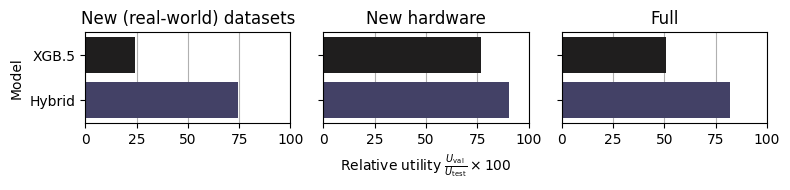

In [6]:
import seaborn as sns
plotdf = merged_results[
    (merged_results.model_type == "own") & 
                        (merged_results.eval_type.isin(["new hardware", "real datasets", "full"]))
                        & (merged_results.model.isin(["XGB.5", "Hybrid"]))
                        ].sort_values("eval_type", ascending=False)
# Filter out unused categories from the 'model' column
plotdf['model'] = plotdf['model'].cat.remove_unused_categories()

group_order = ['real datasets', 'new hardware', 'full']
plotdf['eval_type'] = pd.Categorical(plotdf['eval_type'], categories=group_order, ordered=True)
plotdf = plotdf.sort_values('eval_type')

# Replot the data
fig, axs = plt.subplots(1, 3, figsize=(8, 2), sharex=True)
palette = sns.color_palette("icefire", 13)
palette = [
    *palette[:5],
    *palette[6:]
]

for i in range(0, len(palette)-1, 2):
    palette[i], palette[i+1] = palette[i+1], palette[i]

for i, ((name, group), title) in enumerate(zip(plotdf.groupby('eval_type'), ["New (real-world) datasets", "New hardware", "Full"])):
    ax = axs[i]
    sns.barplot(data=group, x="performance_pct_vs_baseline", y="model", hue="model", ax=ax, palette=palette[4:])
    ax.set_title(name)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis="x")
    ax.set_axisbelow(True)
    ax.set_title(title)
    if i == 1:
        ax.set_xlabel("Relative utility $\\frac{U_{\mathrm{val}}}{U_{\mathrm{test}}} \\times 100$")
    else:
        ax.set_xlabel(None)
    ax.set_ylabel("Model")
    if i > 0:
        ax.set_ylabel(None)
        ax.set_yticklabels([])
    ax.set_xlim([0,100])

fig.tight_layout()
# fig.savefig("/home/pepijn/Documents/uni/y5/thesis/writing/overleaf/chapters/06_evaluation/figures/eval_generalization.pdf", bbox_inches="tight")

## SOTA comparison

4
5
6


/tmp/ipykernel_9609/3213001123.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_right.set_xticklabels(labels=[None])


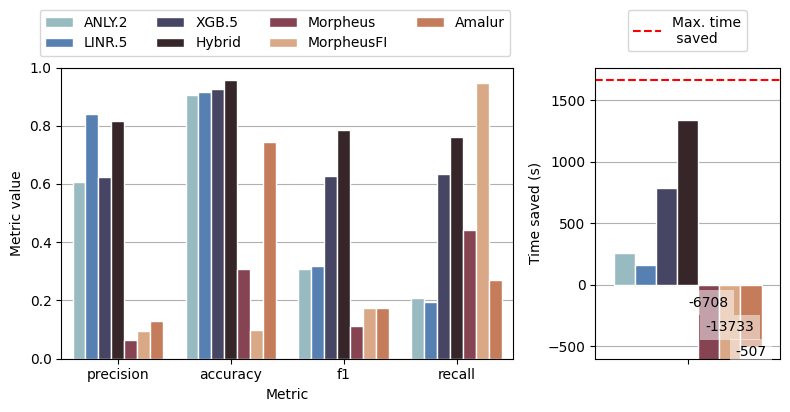

In [7]:
# colors = []
# for c in sns.color_palette("rocket_r", 6):
#     colors.extend([
#                    sns.set_hls_values(c, l=0.4),
#                    c])
# colors.pop(1)

fig, axs = plt.subplot_mosaic("AAB", figsize=(8, 3.7))
melted_df = pd.melt(merged_results, id_vars=["model", "eval_type", 'model_type'], var_name="metric", value_name="metric_value").sort_values("model_type")
max_time_saved = merged_results.y_true_time_saved.max()
min_ylim = -600

sub_df = melted_df[~(melted_df.model.isin(['ANLY.1', 'LINR.1', 'XGB.3'])) & (melted_df.eval_type=='full')]
sub_df['model'] = sub_df['model'].cat.remove_unused_categories()

sub_palette = [
    *palette[:8][1::2],
    *palette[9:]
]
def plot_metrics(ax, metrics: list, legend=True):
    ax.set_axisbelow(True)
    ax.grid(axis="y")
    ax = sns.barplot(
        data=sub_df[(sub_df.metric.apply(lambda x: x in metrics))],
        x="metric",
        y="metric_value",
        hue="model",
        palette=sub_palette,
        # alpha=1,
        saturation=0.6,
        ax=ax,
    )
    if not legend:
        ax.get_legend().remove()
    else:
        legend = ax.legend(loc="upper center", bbox_to_anchor=(1.0, 1.1), ncol=5, borderaxespad=-1)
    # Add metric values as text on top of every bar
    for i, p in enumerate(ax.patches):
        p.set_edgecolor("white")
        fmt = ".2f" if abs(p.get_height()) < 1 else ".0f"
        height = p.get_height()
        if height <( min_ylim+100):
            print(i)
            ax.annotate(
                format(p.get_height(),fmt),
                (p.get_x() + p.get_width() / 2.0, -200 -200 * (i-4)),
                ha="center",
                va="center",
                xytext=(0, 5),
                textcoords="offset points",
                bbox={"facecolor": "white", "alpha": 0.5, "edgecolor": "none"},
            )
    return legend

ax_left = axs["A"]
ax_right = axs["B"]
plot_metrics(ax_left, ["accuracy", "precision", "recall", "f1"], legend=False)
plot_metrics(ax_right, ["y_pred_time_saved"], legend=True)

ax_left.set_xlabel("Metric")
ax_left.set_ylabel("Metric value" )
ax_left.set_ylim(0., 1.)

ax_right.axhline(max_time_saved, ls="--", color="red", label="Max. time\n saved",)
ax_right.set_ylim(min_ylim, max_time_saved+100)
ax_right.set_xlabel(None)

ax_right.set_ylabel("Time saved (s)")
ax_right.set_xticklabels(labels=[None])

handles, labels = ax_right.get_legend_handles_labels()
l1 = fig.legend(handles[:-1], labels[:-1], ncols=4, loc="upper center", bbox_to_anchor=(0.35, 1.1), borderaxespad=0)
ax_right.legend().remove()
l2 = fig.legend([handles[-1]], [labels[-1]], loc="upper center", bbox_to_anchor=(0.865, 1.1), borderaxespad=0)

fig.tight_layout()
# fig.savefig("/home/pepijn/Documents/uni/y5/thesis/writing/overleaf/chapters/06_evaluation/figures/eval_sota_results.pdf", bbox_inches="tight")

In [11]:
merged_results[(merged_results.model.isin(['Hybrid' , 'Amalur'])) & ()]

,model,eval_type,accuracy,precision,recall,f1,y_true_mat_time,y_true_fact_time,y_true_best_time,y_true_time_saved,...,y_pred_speedup_real,TP,FP,TN,FN,fraction_of_optimal_performance,model_type,test_set_fraction_of_optimal_performance,performance_pct_vs_baseline,fraction_time_saved
32,Amalur,cpu,0.795322,0.256944,0.528571,0.345794,430.077463,362.023397,362.023397,68.054066,...,0.774138,"(37, 1.574009380236588, 49.654603664891)","(107, 0.5050579975379094, -130.68373750756132)","(507, 0.5471071317844154, -5292.571298694147)","(33, 1.1158052501723412, 18.399462442474665)",-1.190658,SOTA,NaN,NaN,-1.190658
22,Amalur,full,0.743363,0.128401,0.268923,0.173813,2792.661281,1125.213199,1125.213199,1667.448082,...,0.762470,"(302, 3.4123536322426986, 437.11100135178333)","(2050, 0.5236365896605994, -944.4614645648114)","(8014, 0.3389793863528731, -14513.322579852029)","(821, 4.2392536973143775, 1230.3370807481806)",-0.304268,SOTA,NaN,NaN,-0.304268
42,Amalur,gpu,0.739979,0.120018,0.251662,0.162527,2362.583818,763.189802,763.189802,1599.394016,...,0.760115,"(265, 3.669028112711476, 387.4563976868923)","(1943, 0.5246597030713703, -813.7777270572502)","(7507, 0.324923069990306, -9220.751281157884)","(788, 4.370058010456113, 1211.937618305706)",-0.266552,SOTA,NaN,NaN,-0.266552
2,Amalur,new hardware,0.752671,0.043155,0.147708,0.066795,1408.911454,472.685621,472.685621,936.225833,...,0.603862,"(87, 2.584206354159701, 137.48051386850824)","(1929, 0.521581512806116, -813.656717086516)","(7311, 0.31236672296037205, -9003.094004930736)","(502, 3.4546332294332616, 798.7453194541279)",-0.722236,SOTA,NaN,NaN,-0.722236
12,Amalur,real datasets,0.652914,0.671875,0.389728,0.493308,1895.431467,804.295675,804.295675,1091.135792,...,1.651230,"(258, 3.7724723263290647, 432.6691521731889)","(126, 0.5706541747294778, -130.99267891578242)","(739, 0.6215475166453209, -5635.273089589267)","(404, 5.881286444626252, 658.4666399753256)",0.276479,SOTA,NaN,NaN,0.276479
36,Hybrid,cpu,0.893275,0.471698,0.357143,0.406504,430.077463,362.023397,362.023397,68.054066,...,1.030432,"(25, 1.677574457452197, 44.69548815756005)","(28, 0.6606057753498974, -38.672634793971866)","(586, 0.5340060748147745, -5384.582401407737)","(45, 1.1804568641808022, 23.35857794980562)",0.088501,own,0.98,9.030715,0.088501
26,Hybrid,full,0.958702,0.815664,0.760463,0.787097,2792.661281,1125.213199,1125.213199,1667.448082,...,2.078728,"(854, 4.521364764512191, 1495.364979069831)","(193, 0.7926631952104124, -151.07510503232615)","(9871, 0.3684582934211878, -15306.708939384516)","(269, 2.4152883774683582, 172.08310303013303)",0.806196,own,0.98,82.264892,0.806196
46,Hybrid,gpu,0.962963,0.834004,0.787274,0.809966,2362.583818,763.189802,763.189802,1599.394016,...,2.276642,"(829, 4.607124423953082, 1450.669490912271)","(165, 0.8150729391867422, -112.40247023835425)","(9285, 0.35801015126753766, -9922.12653797678)","(224, 2.6633572082627337, 148.7245250803274)",0.836734,own,0.98,85.380999,0.836734
6,Hybrid,new hardware,0.985146,0.889279,0.859083,0.873921,1408.911454,472.685621,472.685621,936.225833,...,2.291460,"(506, 3.5145084397211797, 894.54911986052)","(63, 0.8016144592094916, -63.840662493603304)","(9177, 0.35298486856664274, -9752.910059523649)","(83, 2.1772357046804185, 41.67671346211614)",0.887295,own,0.98,90.540301,0.887295
16,Hybrid,real datasets,0.766863,0.754153,0.685801,0.718354,1895.431467,804.295675,804.295675,1091.135792,...,1.900026,"(454, 6.106761737978606, 923.3662985135015)","(148, 0.7949963130098725, -129.69377479401615)","(717, 0.5768013758596169, -5636.571993711033)","(208, 2.773402667209697, 167.76949363501308)",0.727382,own,0.98,74.222652,0.727382


7
8
4
8


/tmp/ipykernel_9609/3213001123.py:23: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
/tmp/ipykernel_9609/3213001123.py:23: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(


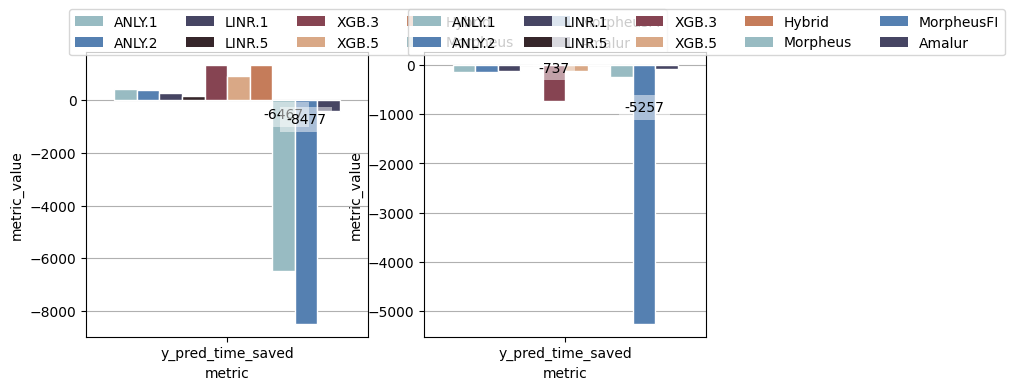

In [9]:
sub_df = melted_df[melted_df.eval_type == "gpu"]
fig, axs = plt.subplots(1, 2, figsize=(8, 3.7))
plot_metrics(axs[0], ["y_pred_time_saved"], legend=True)
sub_df = melted_df[melted_df.eval_type == "cpu"]
plot_metrics(axs[1], ["y_pred_time_saved"], legend=True)
